# Lesson 8
# Plotting, Regression and Curve fitting 

## PSYC 5P02
## Computer Programming for Experimental Psychology
### Stephen Emrich
### Brock University


The library `matplotlib` is the most popular library for data plotting.

The matplot.pyplot functions make matplotlib work like MATLAB!

Let’s start by making a simple plot:

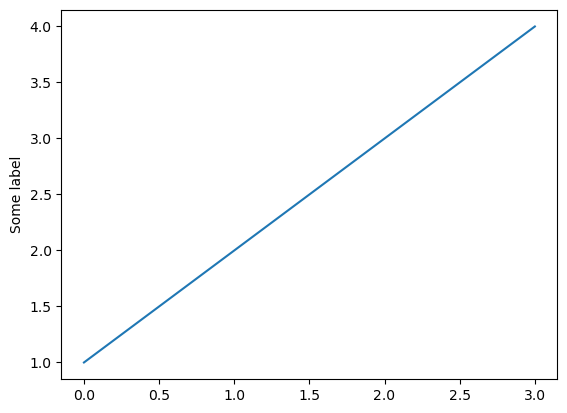

In [8]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.ylabel('Some label')
plt.show()

To run inline: `%matplotlib inline`

In [2]:
%matplotlib inline

Note that we only provided one set of values to the plot, **which defaults to the y-axis**.

The ax-axis values are inferred starting with 0 and with the same length as the y-axis array

* Add some x-axis values using:

`plt.plot([1, 2, 3, 4], [1, 4, 9, 16])`

In [9]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

For every pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the blot. The default string is ‘b-’, which is a solid blue line. To change to red circles, use:

```plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')```

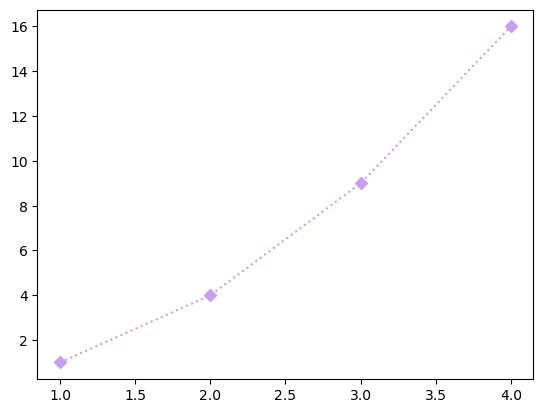

In [30]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], color='xkcd:lavender', linestyle=':', marker='D')
plt.show()

Info on format strings: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

#### Types of plots:

https://matplotlib.org/stable/plot_types/index.html

Lets do a scatter plot:

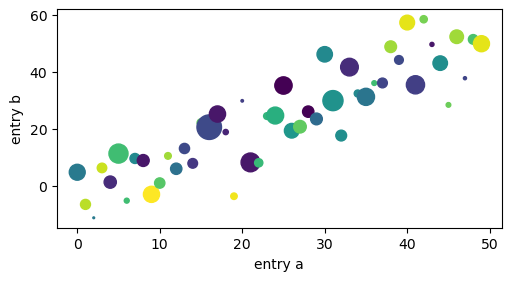

In [37]:
import numpy as np

np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

plt.show()

#### Properties of figures:

The **figure** is the whole figure. It keeps track of all the child **axes** (note - not the same as axis), **Artsits**, and nested **subfigures**

*Axes* is an **Artist** attached to a *figure* that contains a region for plotting data, and usually includes two (or three) **axis** objects

The artists is basically everything visible on the Figure


<Figure size 640x480 with 0 Axes>

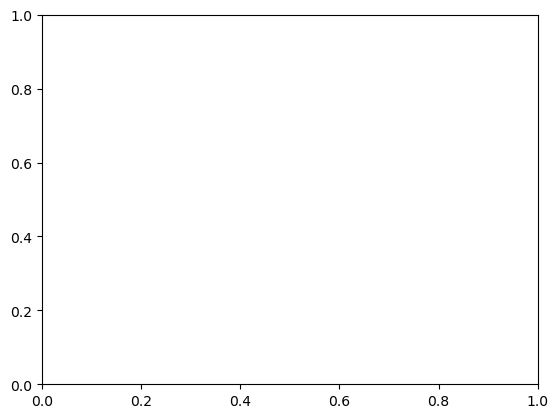

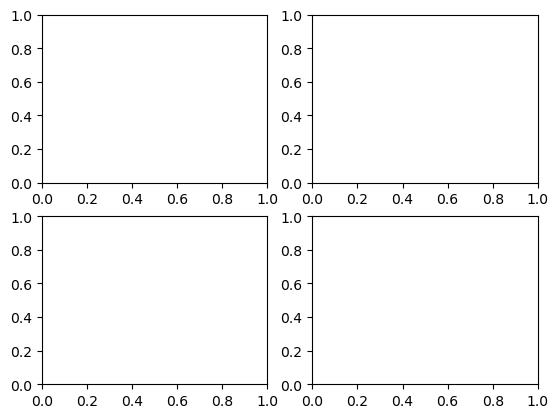

<Figure size 640x480 with 0 Axes>

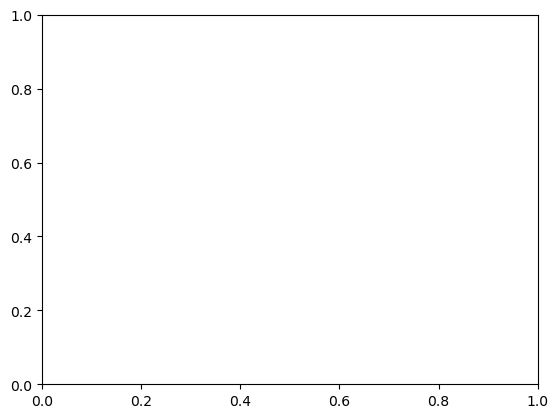

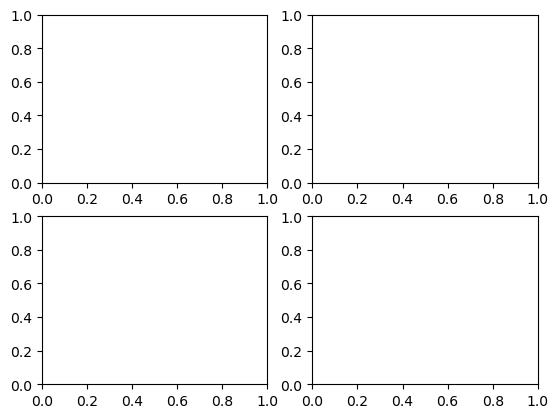

In [39]:
fig = plt.figure()             # an empty figure with no Axes

fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

plt.show()

![Properties of figures](image1.png)

#### Grouping plots

* You can group similar plots in a single figure using subplots

* The call to `plt.subplot()` specifies the **numrows**, **numcols**, and **plot_number**
* **numrows**: number of rows of subplots in your figure
* **numcols:** number of colocums in your figure
* plot_number:** which subplot you are currently working on

Plot number starts in top left and increases by row

By assigning each figure and subplot and axes an object, you can modify properties for each separately

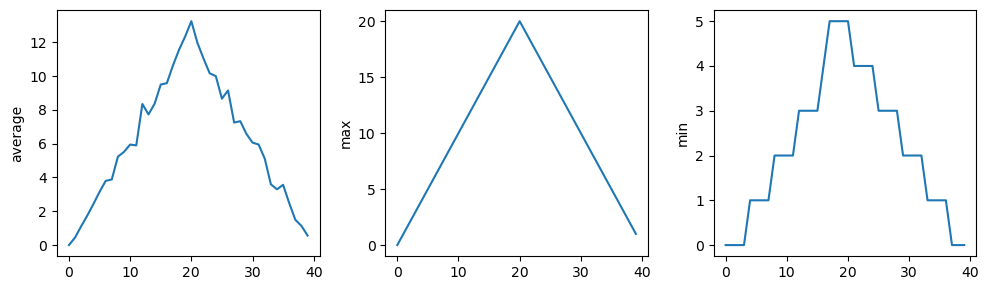

In [41]:
data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))

# 1 x 3 subplots, going from 1 to 3
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.amax(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.amin(data, axis=0))

fig.tight_layout()

plt.savefig('inflammation.png')
plt.show()

**Exercise:** make a fourth plot (sd?) and make the row x columns 2 x 2

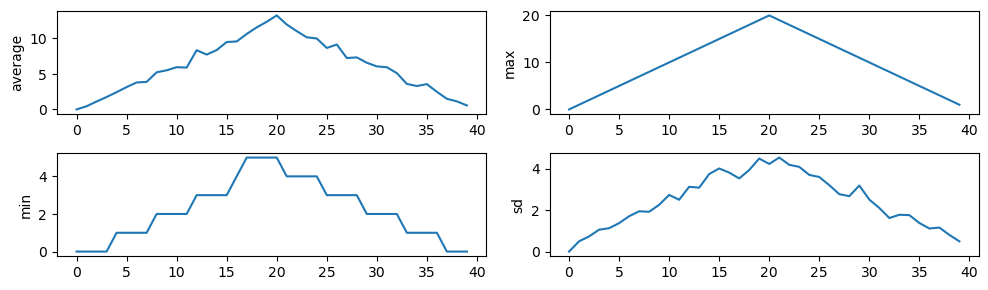

In [57]:
fig = plt.figure(figsize=(10.0, 3.0))

# add_subplot(nrows, ncols, index, **kwargs)
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.amax(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.amin(data, axis=0))

axes4.set_ylabel('sd')
axes4.plot(np.std(data, axis=0))

fig.tight_layout()

plt.show()

![image2.png](image2.png)

Can make more complex layouts with subplot_mosaic

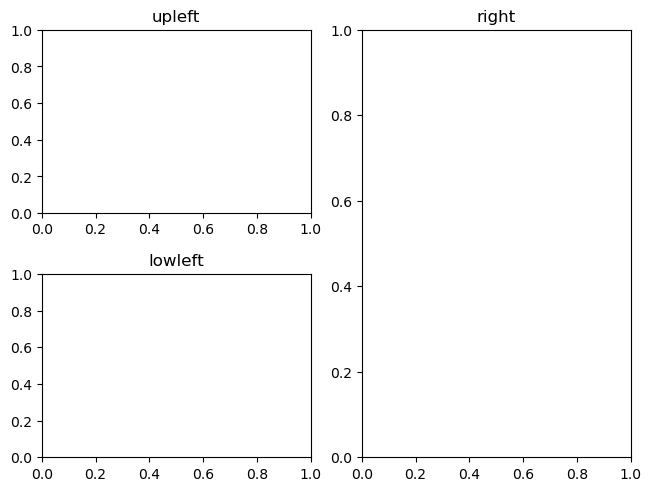

In [60]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

plt.show()

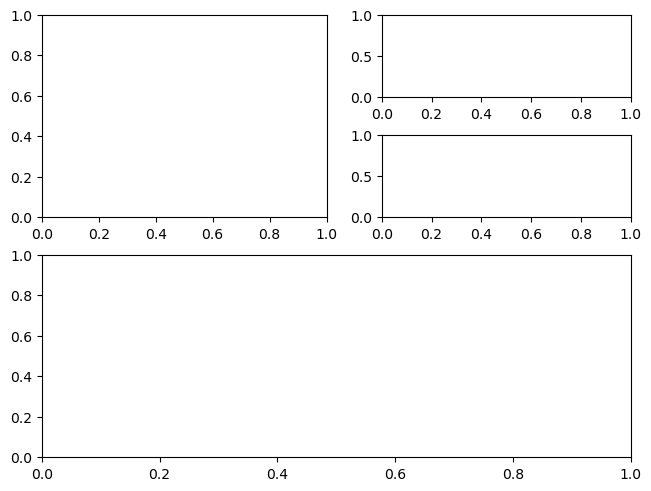

In [63]:
inner = [
    ["inner A"],
    ["inner B"],
]

outer_nested_mosaic = [
    ["main", inner],
    ["bottom", "bottom"],
]
axd = plt.figure(layout="constrained").subplot_mosaic(
    outer_nested_mosaic, empty_sentinel=None
)

plt.show()

* `set_xlabel`, `set_ylabel`, and `set_title` are used to add text in the indicated locations

* can also just add text:

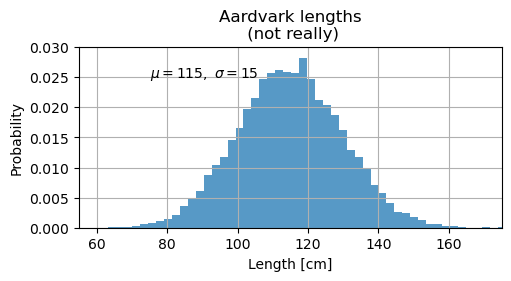

In [68]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000) # returns array
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

plt.show()

* You can add annotation points to a plot, by connecting an arrow pointing to xy to a piece of xytext

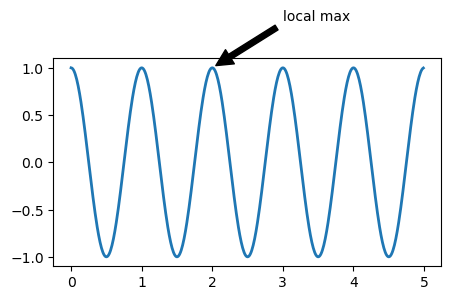

In [70]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
 arrowprops=dict(facecolor='black', shrink=0.05))

# ax.set_ylim(-2, 2)

plt.show()

# Tick locators and formatters

Tick locaters define the size of major and minor ticks

Tick formatters format the string (labels) of major and minor ticks


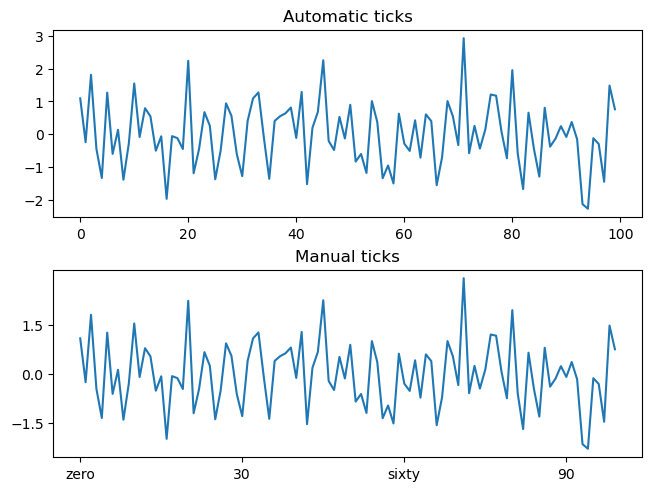

In [71]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data set
xdata = np.arange(len(data1))  # make an ordinal for this

fig, axs = plt.subplots(2, 1, layout='constrained')

axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

plt.show()

https://matplotlib.org/stable/gallery/ticks/tick-locators.html

https://matplotlib.org/stable/gallery/ticks/tick-formatters.html

#### Multiple axis

* You can plot data with with multiple x or y axis objects

* Similarly, you can add a secondary_xaxis or secondary_yaxis that contains a different scale than the main axes

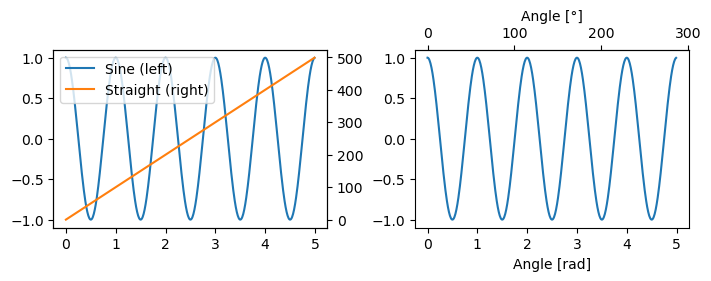

In [81]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx() # make a y axis that shares an x axis with ax1
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)']) # legend([lines], [labels])
# equivalent to ax1.legend...

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions = (np.rad2deg, np.deg2rad)) # a secondary x axis on top, ax3 and ax4 share a y axis (transform, inverse)
ax4.set_xlabel('Angle [°]')

plt.show()

#### Colormaps and colorbars

* 3D data can be presented in a number of different ways, but usually the Z dimension is represented by colors in a colormap

* The colormap (cmap property) is an Artist that derives from ScalarMappable objects. They set a linear mapping between vmin and vmax into the colormap specified by cmap. 

* Adding a colorbar gives a key to relate the color to the underlying data

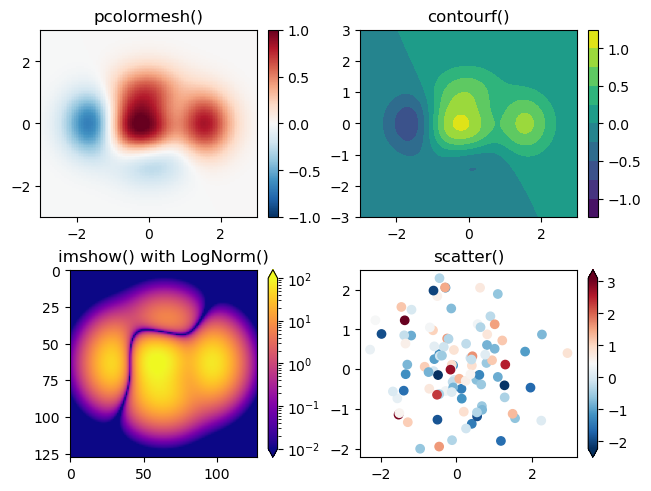

In [86]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both') # pointy ends!
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

plt.show()

https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps

#### Images

* The third example from the 3D color plots used the imshow command

* As a reminder, images are also just 3D (or 4D) data, where the Z-axis corresponds to the lightness or darkness (or RGB triplet) of the pixel

* Can import images with Pillow package

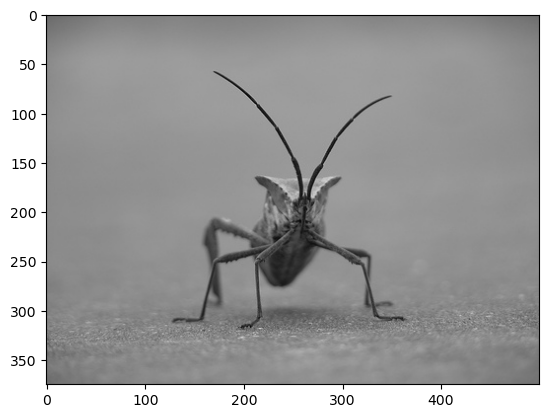

In [89]:
from PIL import Image

import matplotlib.pyplot as plt

img = np.asarray(Image.open('stinkbug.png'))
# print(repr(img))

#plotting numpy arrays as images:
imgplot = plt.imshow(img)

plt.show()

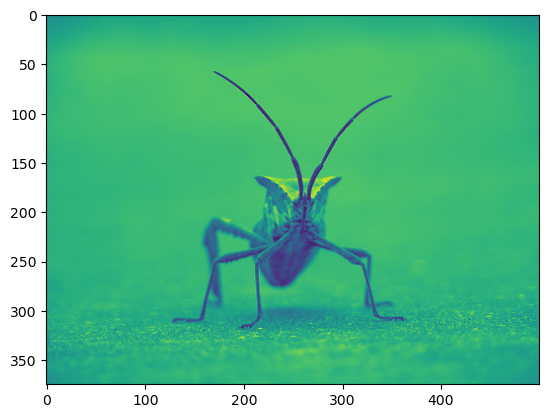

In [91]:
#changing one of the color “guns”
lum_img = img[:, :, 0] # R G B
plt.imshow(lum_img)
plt.show()

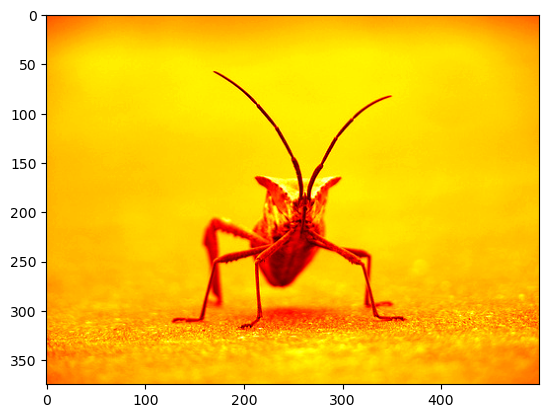

In [93]:
#Applying a colormap:
plt.imshow(lum_img, cmap="hot")
plt.show()

### Seaborn

* Another popular package for plotting data, built on matplotib and numpy 

* Includes tools for creating some things might typically want in publication-quality figures (e.g., error bars)

* Also includes some routines for performing some analyses (e.g., regression

Install with `pip install seaborn` or in conda with `conda install seaborn`


#### Visualizing relationships

* `relplot()` plots relationships between variables

* Default relplot is `scatter()`

* Can control the depiction of the relationship for different subsets using the hue, size, and style parameters

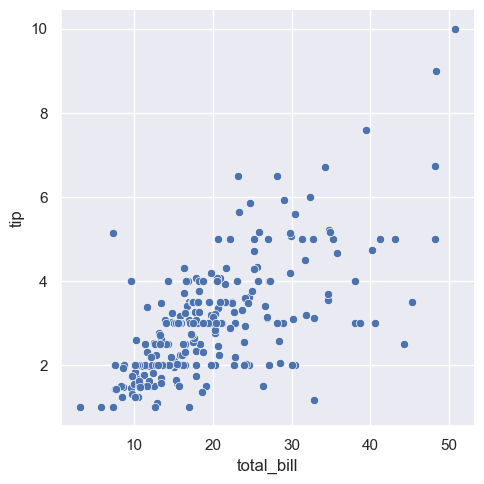

In [97]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")
# more automatic plotting!!!

plt.show()

**Exercise:** add hue="smoker”, style="smoker”, style="time",

In [98]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Line plots

* Changing relplot to `type = “line”` will change it to a line plot where the x variable is time

* Where there are multiple values per point in x, it will create a boot-strapped 95% confidence interval

* Can change errorbar to ‘none’, ‘sd’, or turn estimator = none to not aggregate over y values

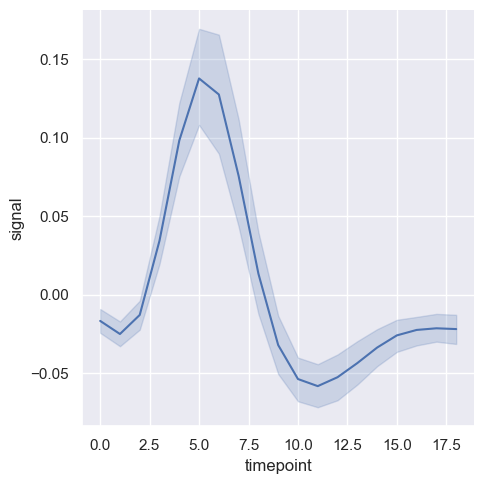

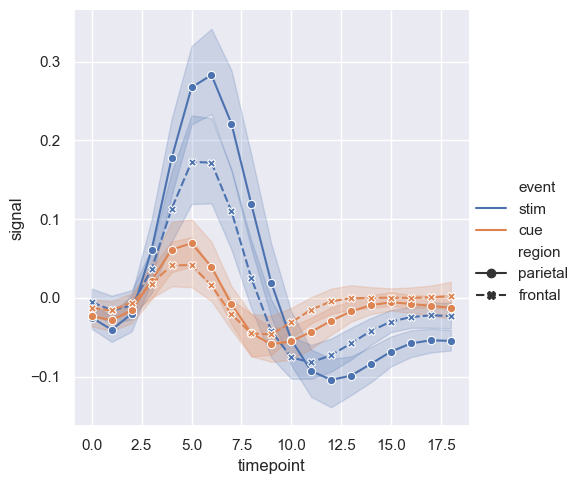

In [114]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")
# plt.show()

sns.relplot(data=fmri, x="timepoint", y="signal", kind="line", hue="event", style="region", markers=True)
plt.show()

In [102]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


**Exercises:**
* plot different aspects of the data using the hue and style properties
* change dashes and markers values (bool)

#### Estimating regressions:

* The two functions that can be used to visualize a linear fit are `regplot()` and `lmplot()`.

* Includes a 95% CI for the regression


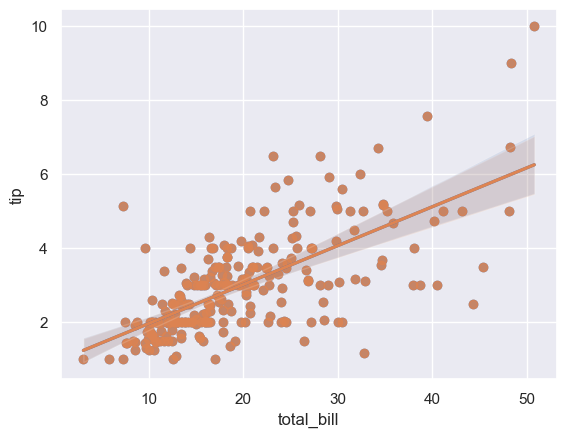

In [104]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);
plt.show()

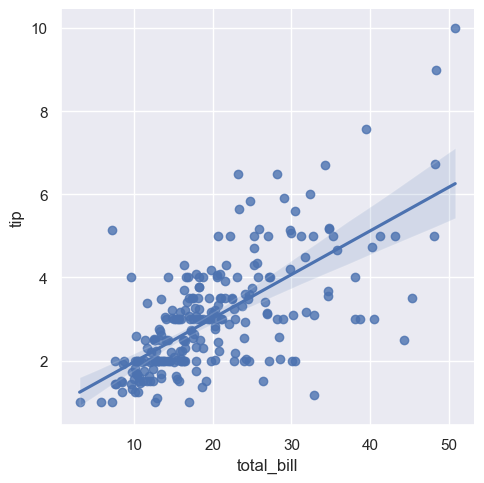

In [105]:
sns.lmplot(x="total_bill", y="tip", data=tips);
plt.show()

#### Other types of fits:

* Not every relationship will be fit with a correlation or regression

* Some fits done to probability density functions (PDFs) rather than to lines

* The **scipy** package has useful tools for both

* `optimize.curvefit` will fit a line to data using least squares estimation

* `stats.fit` can fit PDFs to distributions

* In both cases can customize your curve or your PDF to be fit

* **Can fit two kinds of curves to the same data, based on the breakpoint.** 


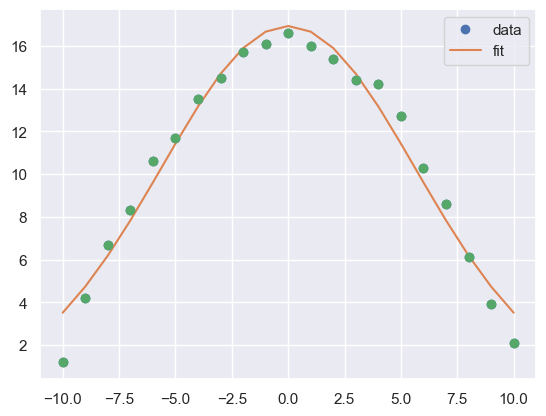

C:\Users\Malavika\AppData\Local\Temp\ipykernel_13280\2433546711.py:16: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


In [116]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

#Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
plt.show()

# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

# fit the data (optimize the parameters of your function)
parameters, covariance = curve_fit(Gauss, xdata, ydata)

#plot the fit using your estimated parameters
fit_y = Gauss(xdata, parameters[0], parameters[1])
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()


Sine function coefficients:
[3.19197056 1.32846455]
Covariance of coefficients:
[[ 3.82747935e-02 -2.91092216e-05]
 [-2.91092216e-05  9.53799895e-05]]


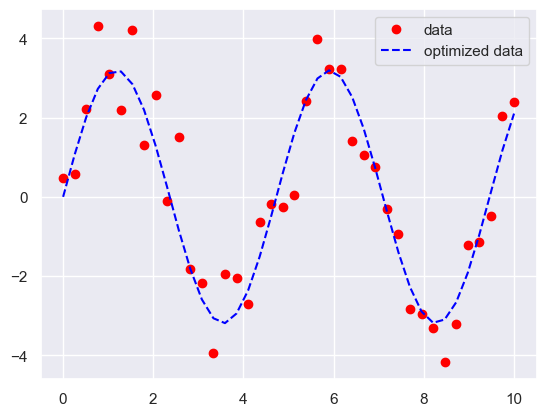

In [118]:

# Generate 40 values between 0 and 10
x = np.linspace(0, 10, num=40)

# Generate noisy sine data
y = 3.45 * np.sin(1.334 * x) + np.random.normal(size=40)

# Sine function model
def test(x, a, b):
    return a * np.sin(b * x)

# Fit the model to the data
param, param_cov = curve_fit(test, x, y)

print("Sine function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

# Generate fitted values using the optimized parameters
ans = param[0] * np.sin(param[1] * x)

# Plot original and fitted data
plt.plot(x, y, 'o', color='red', label="data")
plt.plot(x, ans, '--', color='blue', label="optimized data")
plt.legend()
plt.show()

#### Fitting a PDF:

Fitted Mean (loc): 5.04
Fitted Standard Deviation (scale): 1.96


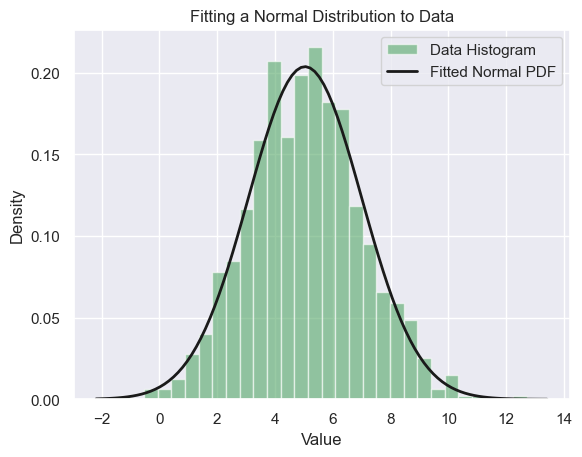

In [119]:
from scipy.stats import norm

# Generate some sample data
data = norm.rvs(loc=5, scale=2, size=1000, random_state=42)

# Fit a normal distribution to the data
loc_fit, scale_fit = norm.fit(data)

print(f"Fitted Mean (loc): {loc_fit:.2f}")
print(f"Fitted Standard Deviation (scale): {scale_fit:.2f}")

# Plot the histogram of the data and the fitted PDF
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, loc_fit, scale_fit)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal PDF')
plt.title("Fitting a Normal Distribution to Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions

### Sources:

* https://python-graph-gallery.com/matplotlib/

* https://seaborn.pydata.org/tutorial/introduction.html

* https://swcarpentry.github.io/python-novice-inflammation/03-matplotlib.html

* https://swcarpentry.github.io/python-novice-gapminder/09-plotting.html

* https://education.molssi.org/python-data-analysis/03-data-fitting/index.html

* https://www.geeksforgeeks.org/machine-learning/scipy-curve-fitting/
